# 5章 集合と確率を操作する

In [1]:
from sympy import FiniteSet

In [2]:
FiniteSet(2,4,6)

{2, 4, 6}

In [3]:
FiniteSet(1,1,2)

{1, 2}

In [4]:
from sympy import FiniteSet
from fractions import Fraction

FiniteSet(1,1.5, Fraction(1,5))

{1/5, 1, 1.5}

In [5]:
FiniteSet(1,1.5, Fraction(3,2))

{1, 1.5, 3/2}

In [6]:
len(FiniteSet(1,1.5, Fraction(1,5)))

3

In [7]:
1 in FiniteSet(1,1.5, Fraction(3,2))

True

In [8]:
2 in FiniteSet(1,1.5, Fraction(3,2))

False

In [9]:
l = [1,2,3,4]
FiniteSet(*l)

{1, 2, 3, 4}

### 次回、部分集合, 上位集合, べき集合

デュエルスタンバイ

In [10]:
s = FiniteSet(1)
t = FiniteSet(1,2)

In [11]:
s.is_subset(t)

True

In [12]:
t.is_subset(s)

False

In [13]:
s.is_superset(t)

False

In [14]:
t.is_superset(s)

True

In [15]:
u = FiniteSet(1,2,3)

In [16]:
u.powerset()

{EmptySet(), {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3}}

In [17]:
s.union(t)

{1, 2}

In [18]:
u.intersect(s)

{1}

In [19]:
u.intersect(t)

{1, 2}

In [20]:
p = s * t
p

{1} x {1, 2}

In [21]:
for e in p:
    print(e)

(1, 1)
(1, 2)


In [22]:
from sympy import FiniteSet, pi

def time_period(l):
    g = 9.8
    T = 2 * pi *(l / g) ** 0.5
    return T

L = FiniteSet(15,18,21,22.5,25)
for l in L:
    t = time_period(l / 100)
    print(float(t))

0.7773425846718076
0.8515361370682372
0.9197641499438565
0.9520463438910783
1.0035449615772465


## 確率

- 実験
  - 行いたいテスト
- 標本空間
  - 全ての可能な結果
- 事象
  - 確率を計算しようとする結果の集合





In [23]:
from sympy import FiniteSet
s = FiniteSet(1,2,3,4,5,6)
a = FiniteSet(2,3,5)
b = FiniteSet(1,3,5)
e = a.union(b)
len(e) / len(s)

0.6666666666666666

In [24]:
len(a.intersect(b)) / len(s)

0.3333333333333333

In [25]:
import random

def toss():
    if random.random() < 2/3:
        return 0
    else:
        return 1

    

In [26]:
import random

def get_index(probability):
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    r = random.random()
    for index, sp in enumerate(sum_probability):
        if r <= sp:
            return index
    return len(probability) - 1

def dispense():
    dollar_bills = [5,10,20,50]
    probability = [1/6,1/6,1/3,1/3]
    bill_index = get_index(probability)
    return dollar_bills[bill_index]


In [27]:
dispense()


50

In [28]:
dispense()

5

## プログラミングチャレンジ



In [30]:
%matplotlib inline

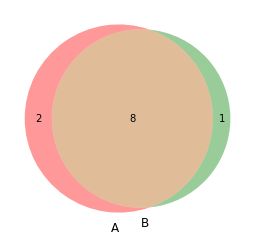

In [31]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from sympy import FiniteSet

def draw_venn(sets):
    venn2(subsets = sets)
    plt.show()

s1 = FiniteSet(1,3,5,7,9,11,13,15,17,19)
s2 = FiniteSet(1,3,5,7,11,13,17,19,21)
draw_venn([s1, s2])

In [52]:
import random
from collections import Counter

def dice():
    return random.randint(1,6)

def count(n):
    cnt = Counter()
    for i in range(0, n):
        x = dice()
        cnt[x] += 1
    return cnt

def e(counter, n):
    s = 0
    for idx, x in enumerate(counter):
        s += x * counter[x] / n
    return s

if __name__ == '__main__':
    for n in [1,10,20,50,100,1000,10000,100000,1000000]:
        c = count(n)
        s = e(c, n)
        print ("Trials: {}. Trial average {}".format(n, s))

Trials: 1. Trial average 4.0
Trials: 10. Trial average 3.0999999999999996
Trials: 20. Trial average 3.5
Trials: 50. Trial average 3.76
Trials: 100. Trial average 3.6
Trials: 1000. Trial average 3.501
Trials: 10000. Trial average 3.5016999999999996
Trials: 100000. Trial average 3.49106
Trials: 1000000. Trial average 3.502282
